In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DATA OVERVIEW
Dataset Shape: (2000, 11)

First 10 rows:


,battery_power,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,price_range
0,842,2.2,1,7,188,2,2,20,756,2549,1
1,1021,0.5,0,53,136,3,6,905,1988,2631,2
2,563,0.5,2,41,145,5,6,1263,1716,2603,2
3,615,2.5,0,10,131,6,9,1216,1786,2769,2
4,1821,1.2,13,44,141,2,14,1208,1212,1411,1
5,1859,0.5,3,22,164,1,7,1004,1654,1067,1
6,1821,1.7,4,10,139,8,10,381,1018,3220,3
7,1954,0.5,0,24,187,4,0,512,1149,700,0
8,1445,0.5,0,53,174,7,14,386,836,1099,0
9,509,0.6,2,9,93,5,15,1137,1224,513,0



Data Description:


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0



Missing Values:
battery_power    0
clock_speed      0
fc               0
int_memory       0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
price_range      0
dtype: int64
The Actual Distribution
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64



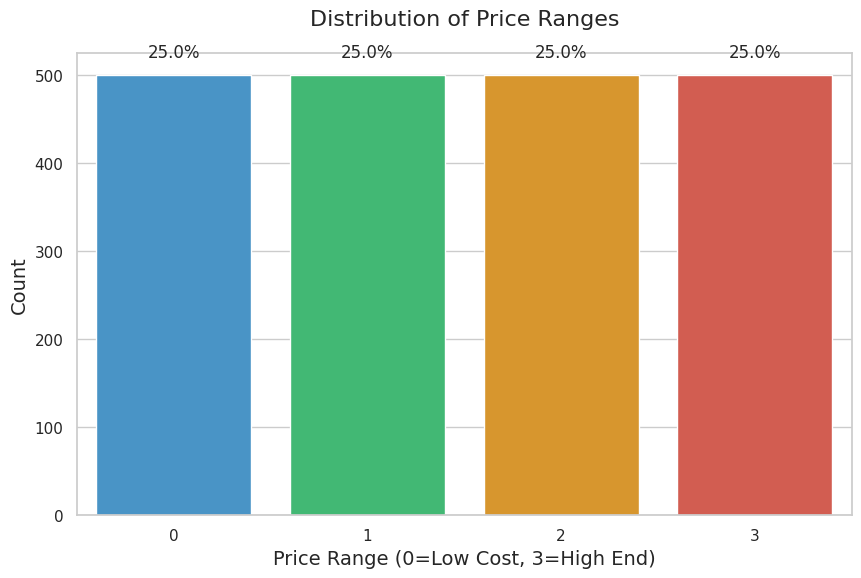

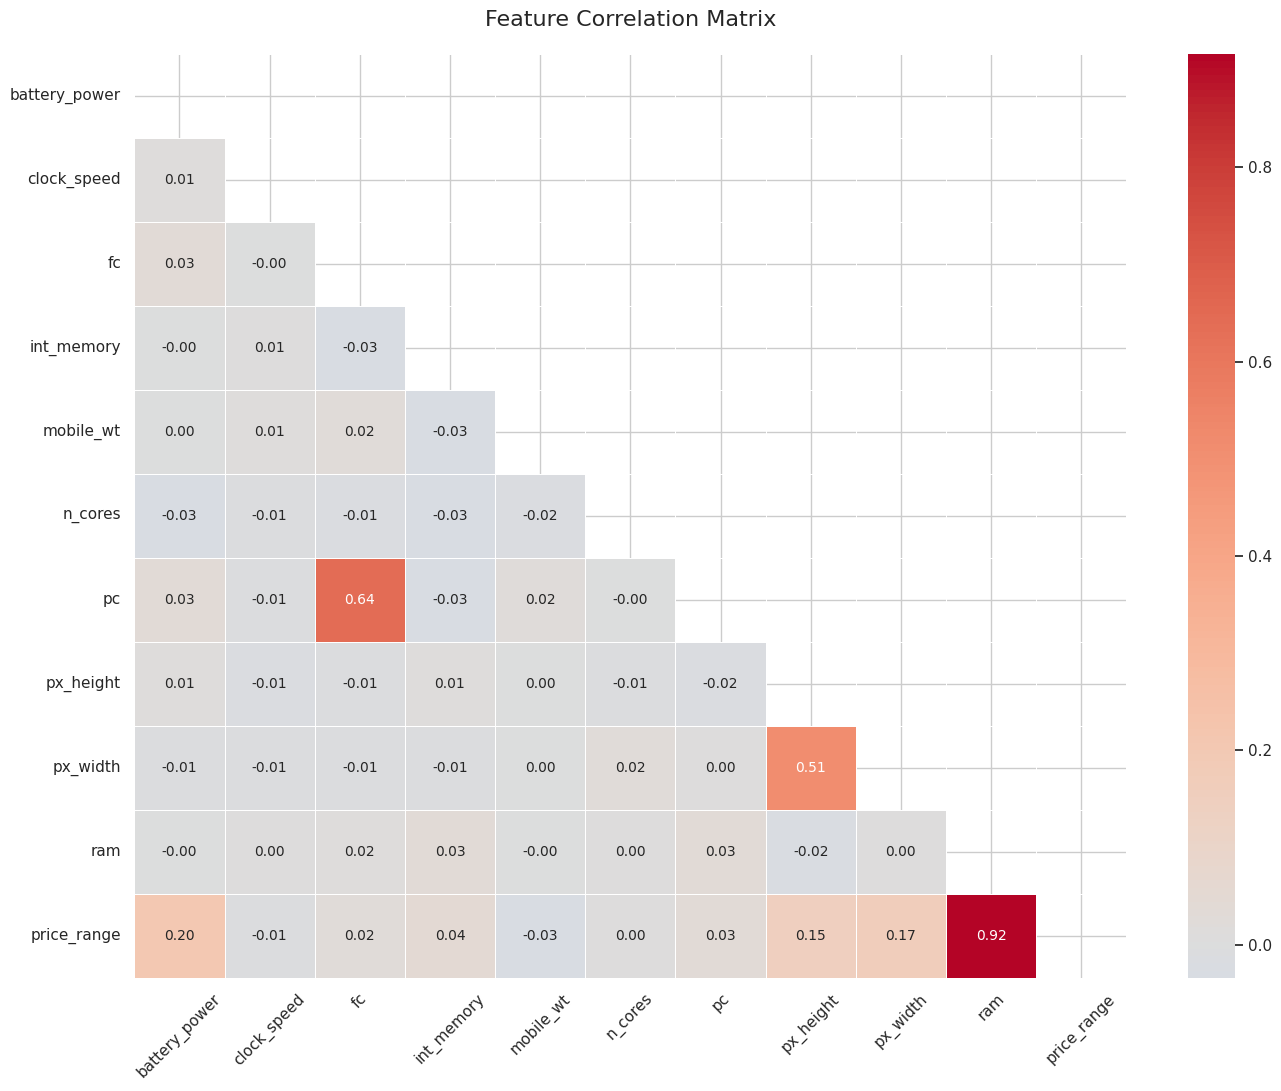

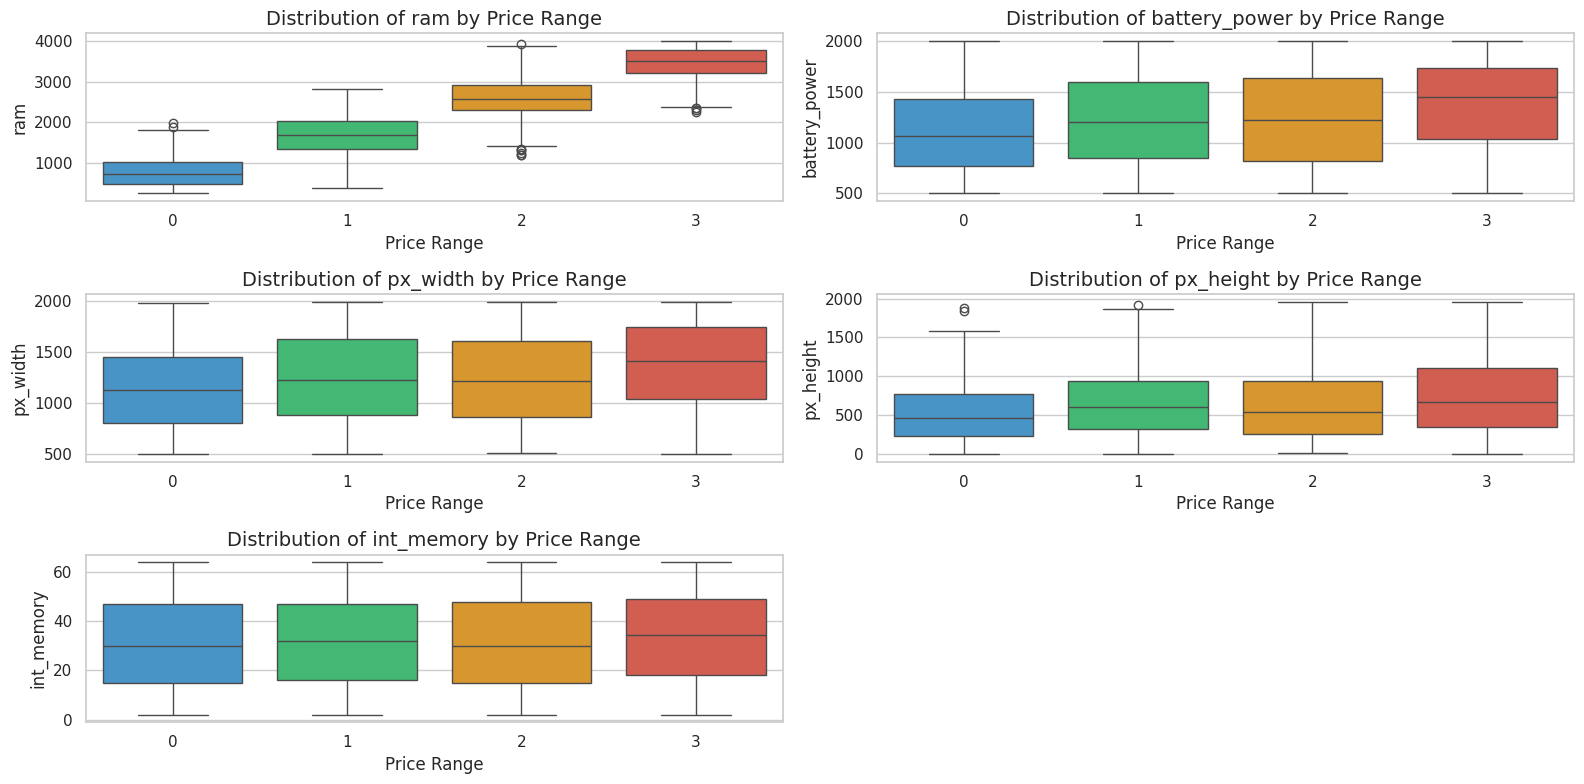

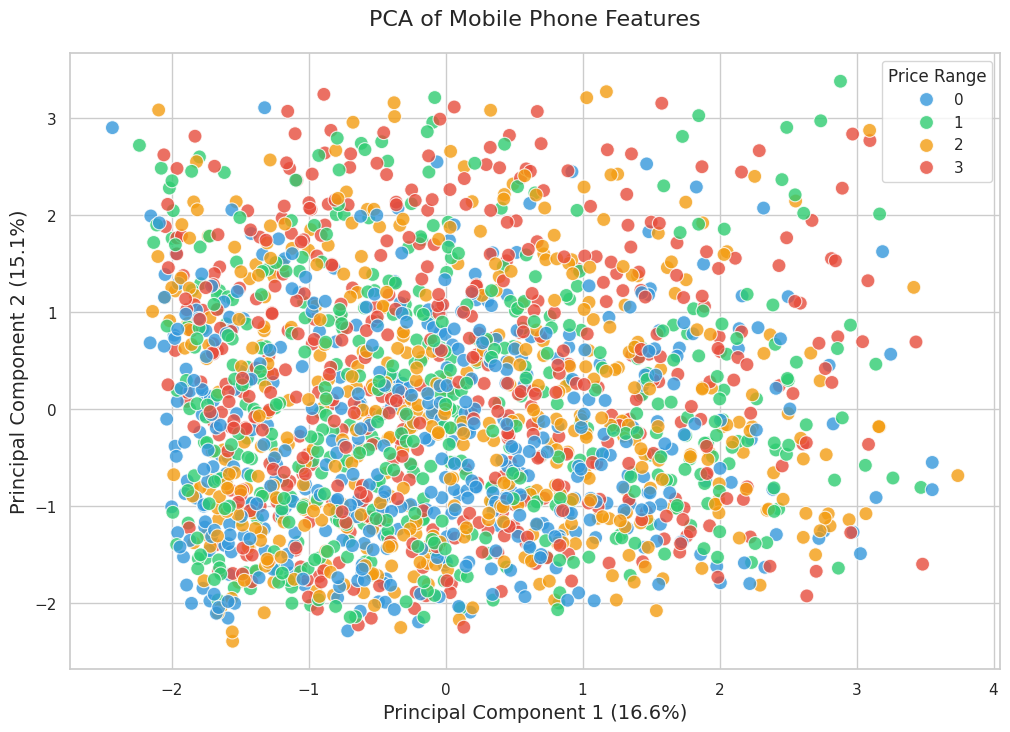

[1 2 3 0]

ANOVA Test Results for Key Features:
ram: F-statistic = 3520.11, p-value = 0.0000
battery_power: F-statistic = 31.60, p-value = 0.0000
px_width: F-statistic = 22.62, p-value = 0.0000
px_height: F-statistic = 19.48, p-value = 0.0000
int_memory: F-statistic = 2.92, p-value = 0.0328


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore')

# Load dataset
df = pd.read_csv('../train_after_drop.csv')

# Set global styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
colors = ["#3498db", "#2ecc71", "#f39c12", "#e74c3c"]

# =====================
# 1. Data Overview
# =====================
print("="*50)
print("DATA OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print("\nFirst 10 rows:")
display(df.head(10))
print("\nData Description:")
display(df.describe().T)
print("\nMissing Values:")
print(df.isnull().sum())
print("="*50)
print("The Actual Distribution")
print(df['price_range'].value_counts())
print()
# =====================
# 2. Target Distribution
# =====================

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='price_range', data=df, palette=colors)
plt.title('Distribution of Price Ranges', fontsize=16, pad=20)
plt.xlabel('Price Range (0=Low Cost, 3=High End)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add percentage annotations
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)

plt.show()

# =====================
# 3. Feature Relationships
# =====================
# Correlation matrix
plt.figure(figsize=(16, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, 
            annot_kws={"size": 10}, fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Top 5 most correlated features with price_range
top_features = corr['price_range'].sort_values(ascending=False)[1:6].index.tolist()

# =====================
# 2. Boxplots for Top Features by Price Range
# =====================
# Create subplots for boxplots
num_features = len(top_features)
cols = 2  # Number of columns in the grid
rows = (num_features + cols - 1) // cols  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
axes = axes.flatten()  # Flatten axes array for easier indexing

# Loop through the top features and create the boxplots
for i, feature in enumerate(top_features):
    sns.boxplot(x='price_range', y=feature, data=df, palette=colors, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Price Range', fontsize=14)
    axes[i].set_xlabel('Price Range', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# =====================
# 6. Multivariate Analysis (PCA)
# =====================
# PCA Visualization
features = df.drop('price_range', axis=1)
target = df['price_range']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC1', 'PC2'])
pca_df['Price Range'] = target

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Price Range', 
                data=pca_df, palette=colors, s=100, alpha=0.8)
plt.title('PCA of Mobile Phone Features', fontsize=16, pad=20)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=14)
plt.legend(title='Price Range')
plt.show()


print(df['price_range'].unique())  # Should output [0, 1, 2, 3]
# =====================
# 7. Statistical Tests (Optional)
# =====================
from scipy.stats import f_oneway

print("\nANOVA Test Results for Key Features:")
for feature in top_features:
    groups = [df[df['price_range'] == i][feature] for i in range(4)]
    f_stat, p_value = f_oneway(*groups)
    print(f"{feature}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

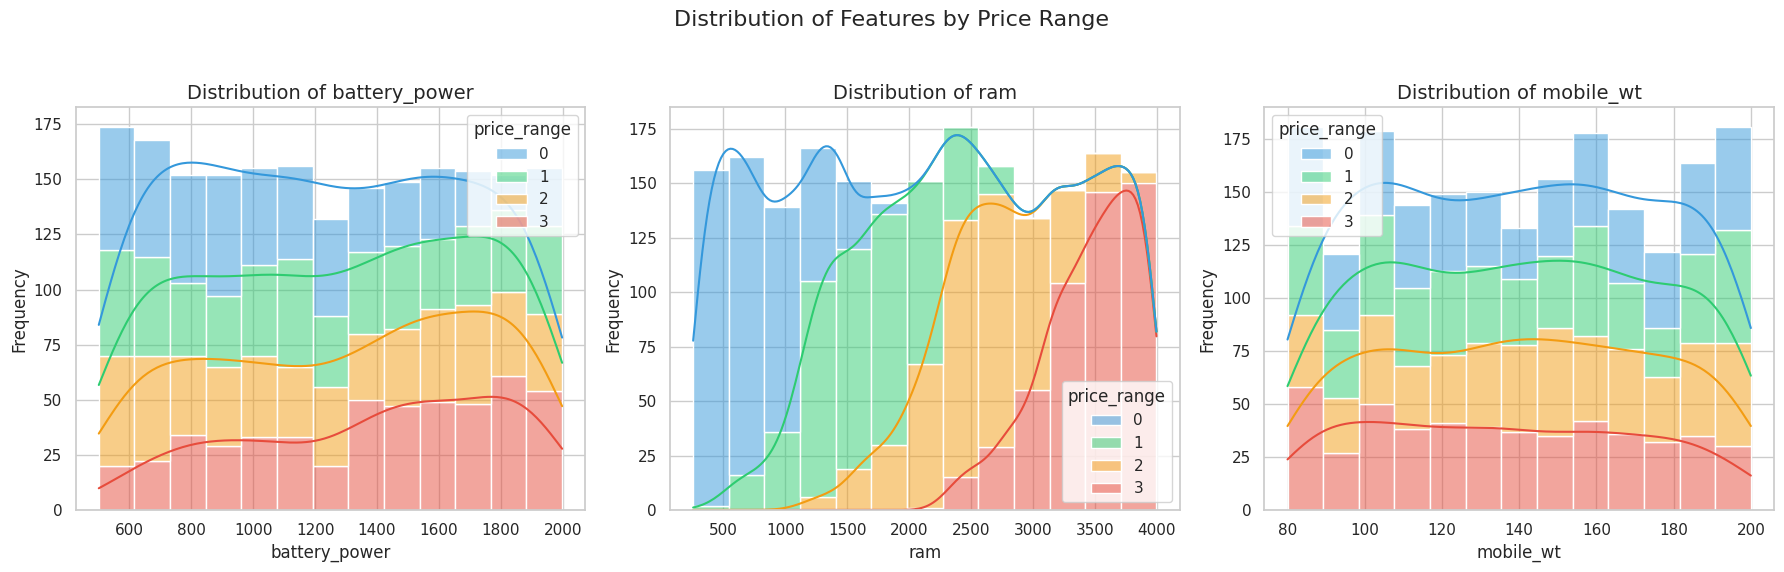

In [3]:
# Distribution of features (e.g., battery power, ram, mobile weight)
features_to_plot = ['battery_power', 'ram', 'mobile_wt']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
fig.suptitle('Distribution of Features by Price Range', fontsize=16)

# Loop through each feature and plot on the respective subplot
for i, feature in enumerate(features_to_plot):
    sns.histplot(data=df, x=feature, hue="price_range", multiple="stack", palette=colors, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjust layout to make sure titles and labels fit well
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid overlap with suptitle
plt.show()


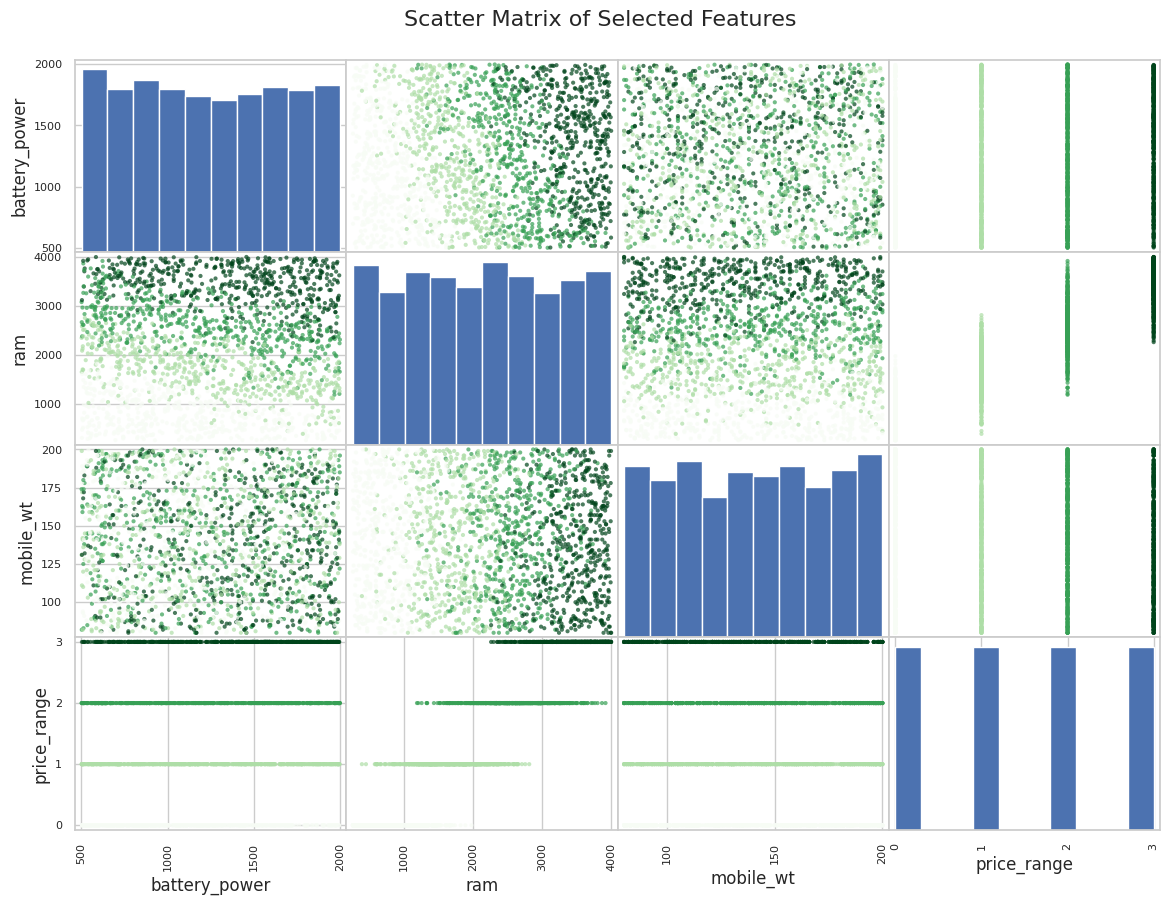

In [4]:
# Scatter matrix of selected features
scatter_matrix(df[features_to_plot + ['price_range']], figsize=(14, 10), c=df['price_range'], cmap='Greens', alpha=0.7)
plt.suptitle('Scatter Matrix of Selected Features', fontsize=16, y=0.93)
plt.show()


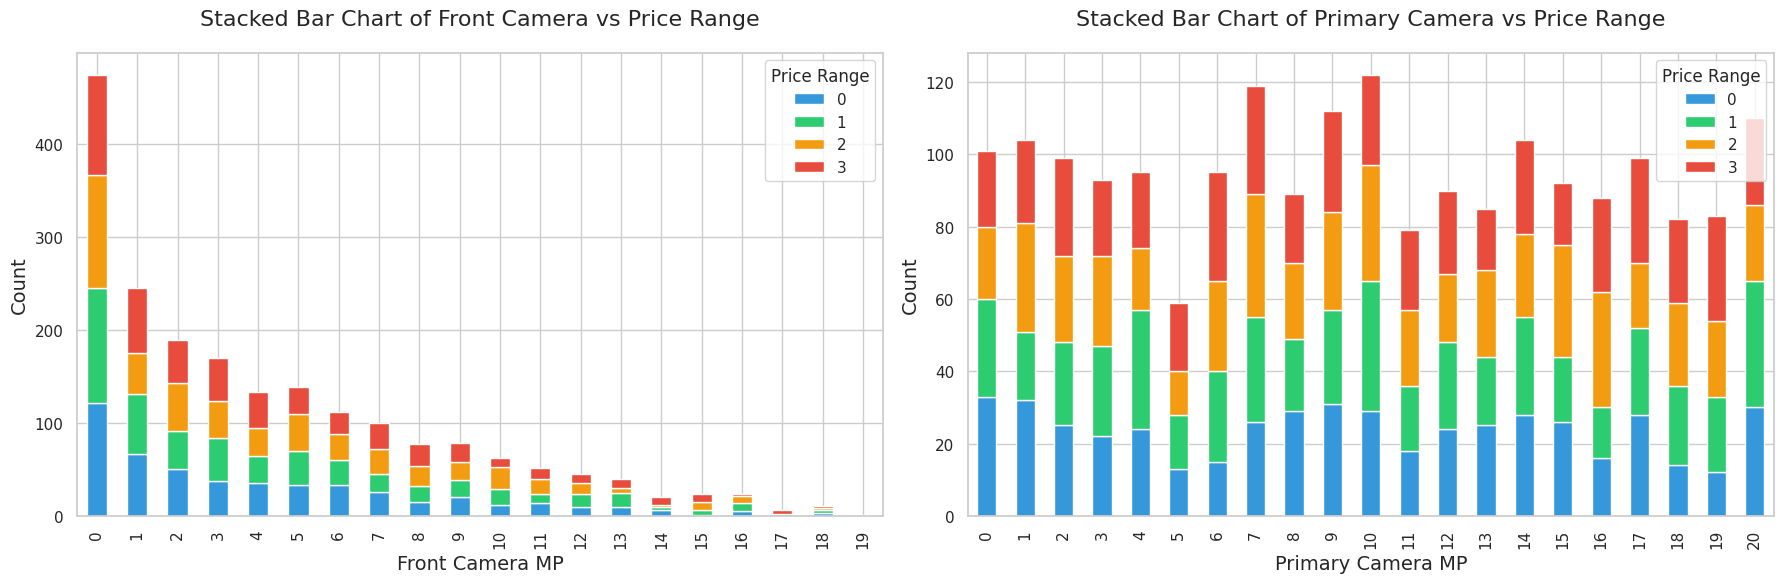

In [5]:
# Stacked bar chart for 'fc' (front camera) and 'pc' (primary camera)
# First, create the cross-tab for 'fc' and 'price_range'
fc_data = pd.crosstab(df['fc'], df['price_range'])

# Now, create the cross-tab for 'pc' and 'price_range'
pc_data = pd.crosstab(df['pc'], df['price_range'])

# Plot both 'fc' and 'pc' in a stacked bar chart
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Front Camera (fc) Stacked Bar Chart
fc_data.plot(kind='bar', stacked=True, color=colors, ax=axes[0])
axes[0].set_title('Stacked Bar Chart of Front Camera vs Price Range', fontsize=16, pad=20)
axes[0].set_xlabel('Front Camera MP', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Price Range')

# Primary Camera (pc) Stacked Bar Chart
pc_data.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
axes[1].set_title('Stacked Bar Chart of Primary Camera vs Price Range', fontsize=16, pad=20)
axes[1].set_xlabel('Primary Camera MP', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Price Range')

plt.tight_layout()
plt.show()


In [6]:
import plotly.graph_objects as go
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def plot_anova_results(feature):
    # Perform ANOVA
    groups = [df[df['price_range'] == i][feature] for i in range(4)]
    f_stat, p_val = f_oneway(*groups)
    
    # Perform Tukey's HSD post-hoc test
    tukey = pairwise_tukeyhsd(endog=df[feature],
                             groups=df['price_range'],
                             alpha=0.05)
    
    # Create figure
    fig = go.Figure()
    
    # Add box plots
    for i in range(4):
        fig.add_trace(go.Box(
            y=df[df['price_range'] == i][feature],
            name=f'Price Range {i}',
            boxpoints='outliers',
            marker_color=colors[i],
            line_color='black'
        ))
    
    # Add ANOVA info as annotation
    fig.add_annotation(
        x=0.5, y=1.1,
        xref='paper', yref='paper',
        text=f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}",
        showarrow=False,
        font=dict(size=14)
    )
    
    # Add significant pairs from Tukey's test
    y_pos = df[feature].max() * 1.05
    for i, pair in enumerate(tukey._results_table.data[1:]):
        if pair[4]:  # If significant
            fig.add_shape(type='line',
                x0=pair[0]+0.1, x1=pair[1]-0.1,
                y0=y_pos, y1=y_pos,
                line=dict(color='red', width=2))
            fig.add_annotation(
                x=(pair[0]+pair[1])/2, y=y_pos,
                text="*", showarrow=False,
                font=dict(size=20, color='red')
            )
            y_pos += df[feature].max() * 0.05
    
    fig.update_layout(
        title=f'{feature} Distribution by Price Range with ANOVA Results',
        yaxis_title=feature,
        xaxis_title='Price Range',
        height=600
    )
    fig.show()

# Example usage
plot_anova_results('ram')

In [7]:
def plot_radar_chart():
    # Calculate mean values for each price range
    mean_values = df.groupby('price_range').mean()[top_features]
    
    # Normalize data for radar chart
    normalized = (mean_values - mean_values.min()) / (mean_values.max() - mean_values.min())
    
    fig = go.Figure()
    
    for i in range(4):
        fig.add_trace(go.Scatterpolar(
            r=normalized.loc[i].values,
            theta=normalized.columns,
            fill='toself',
            name=f'Price Range {i}',
            line_color=colors[i],
            opacity=0.8
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 1])
        ),
        title='Feature Profiles Across Price Ranges (Normalized)',
        showlegend=True,
        height=600
    )
    fig.show()

plot_radar_chart()

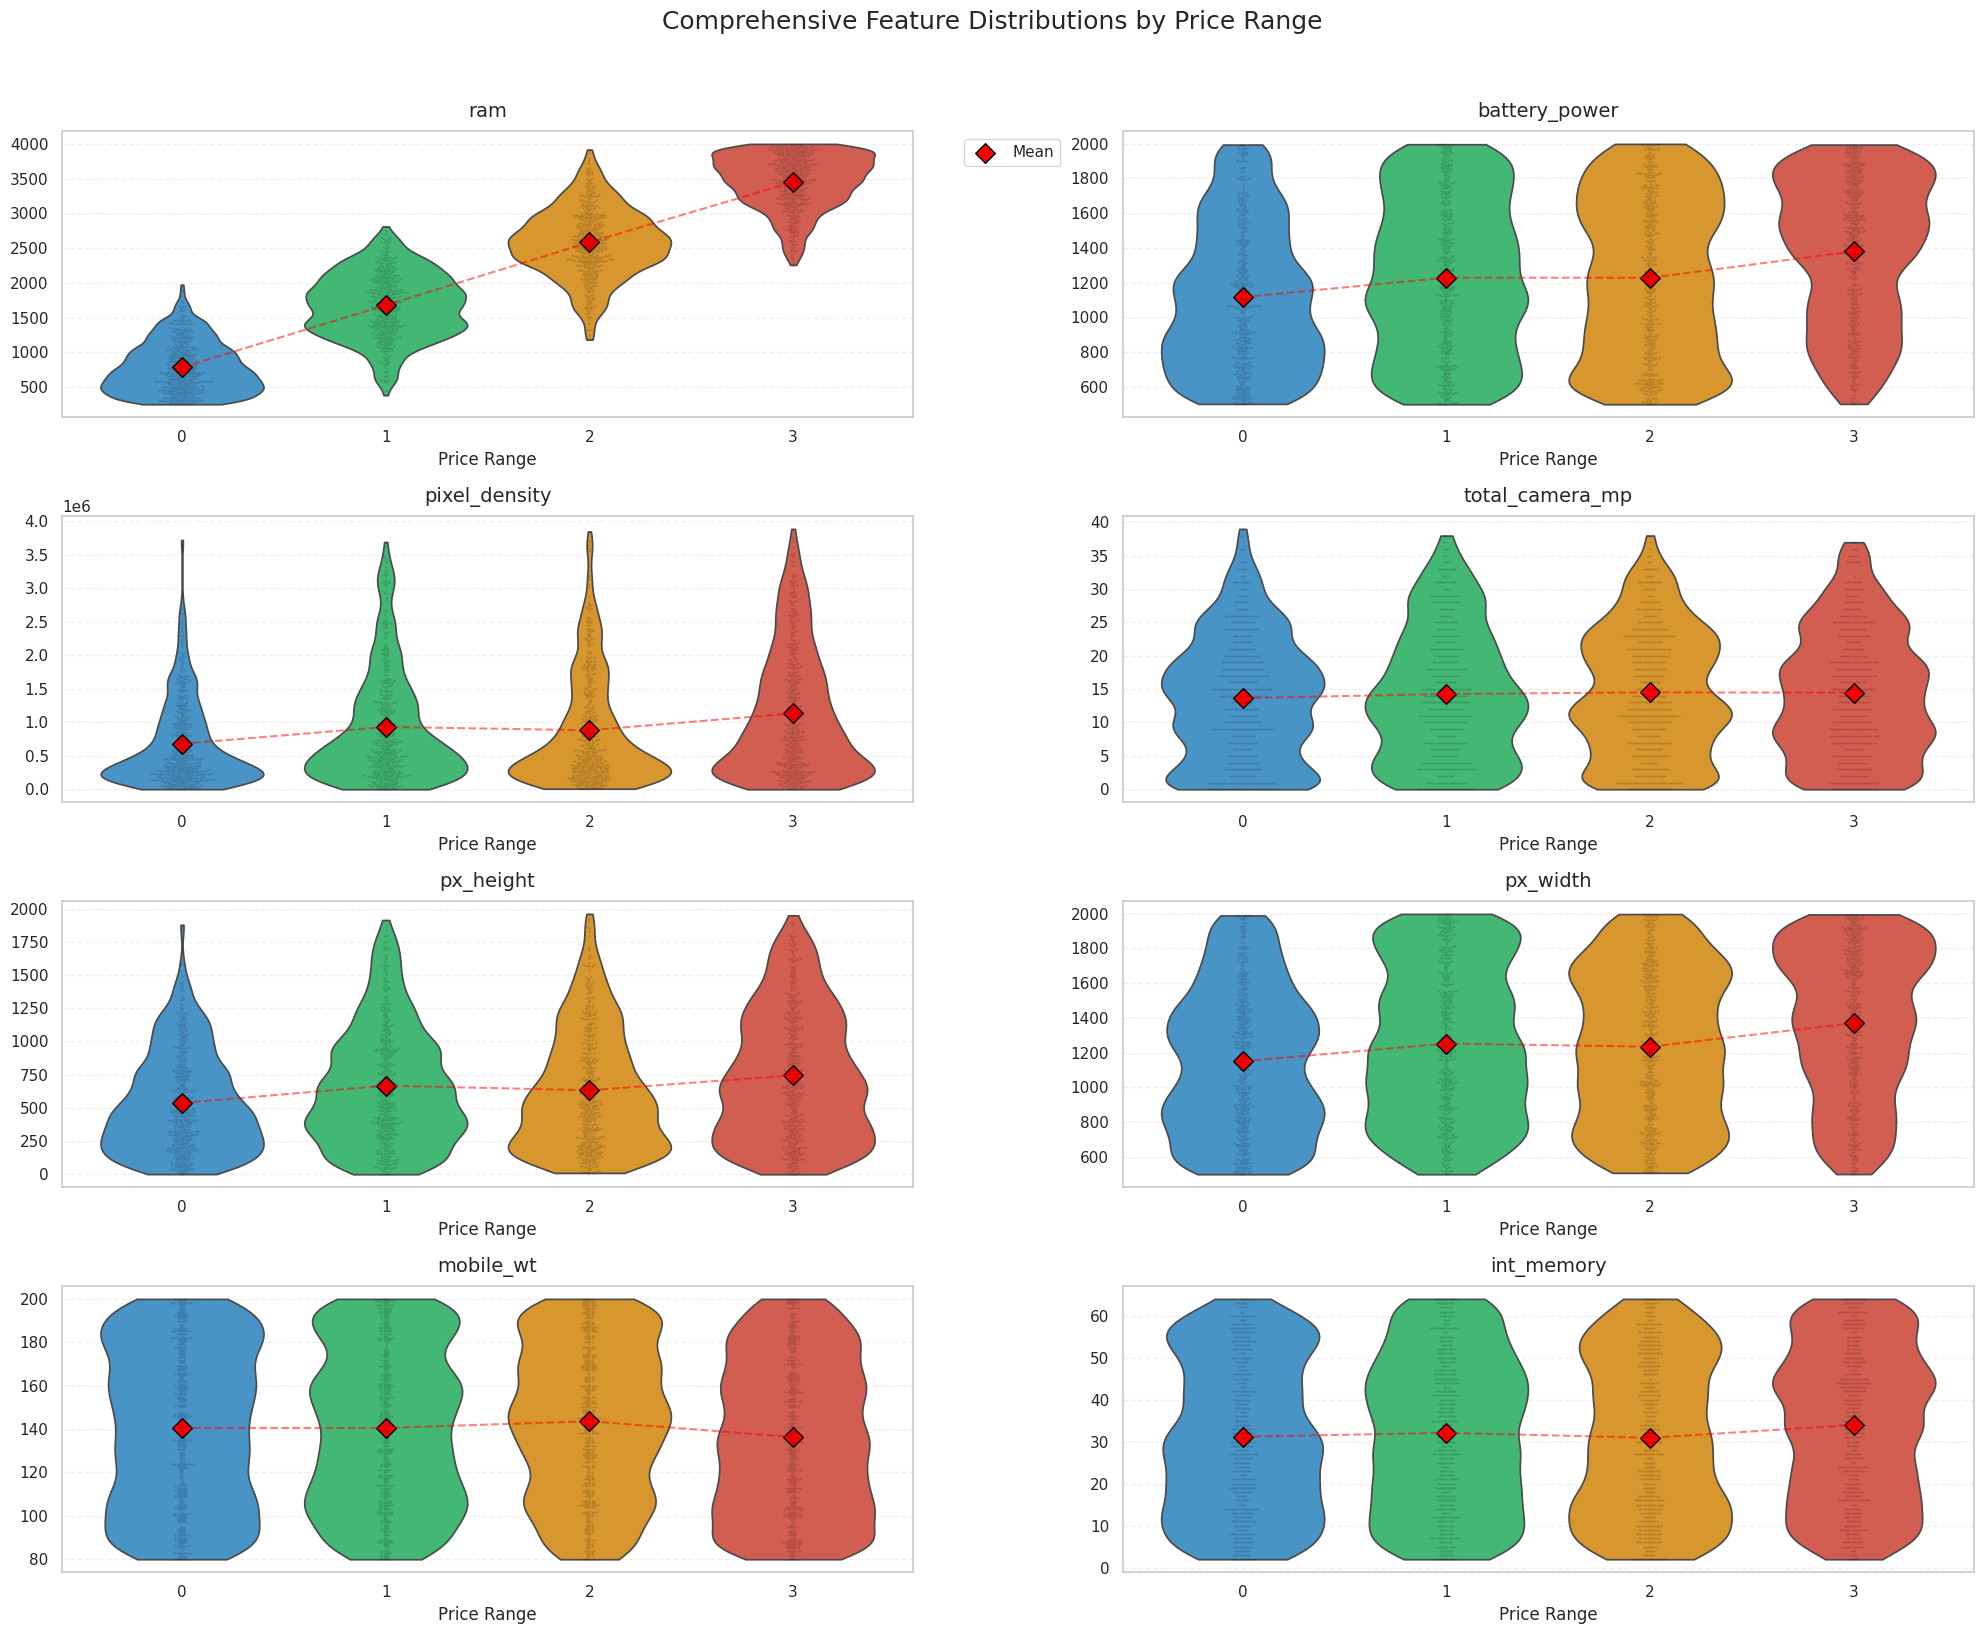

In [8]:
# Create the missing features before plotting
df['pixel_density'] = df['px_height'] * df['px_width']
df['total_camera_mp'] = df['fc'] + df['pc']

# Now run the visualization code again
important_features = ['ram', 'battery_power', 'pixel_density', 'total_camera_mp',
                     'px_height', 'px_width', 'mobile_wt', 'int_memory']

plt.figure(figsize=(20, 16))
plt.suptitle('Comprehensive Feature Distributions by Price Range', y=1.02, fontsize=18)

for i, feature in enumerate(important_features, 1):
    plt.subplot(4, 2, i)
    
    # Verify feature exists
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' is missing from DataFrame")
        
    sns.violinplot(x='price_range', y=feature, data=df, palette=colors, 
                  inner=None, bw=0.2, cut=0)
    sns.swarmplot(x='price_range', y=feature, data=df, color='black', 
                 alpha=0.15, size=1.5)
    
    means = df.groupby('price_range')[feature].mean()
    for j, mean in enumerate(means):
        plt.scatter(j, mean, color='red', s=100, marker='D', 
                   edgecolor='black', linewidth=1, 
                   label='Mean' if j == 0 else "")
    
    plt.plot(range(4), means, color='red', linestyle='--', alpha=0.5)
    plt.title(f'{feature}', fontsize=14, pad=10)
    plt.xlabel('Price Range', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    if i == 1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
fig = plt.gcf()
plt.show()

In [10]:
fig = px.scatter_3d(df, x='ram', y='battery_power', z='pixel_density',
                    color='price_range', color_discrete_sequence=colors,
                    title='3D Relationship of Top Features',
                    labels={'ram': 'RAM (MB)', 
                           'battery_power': 'Battery Power',
                           'pixel_density': 'Pixel Density'},
                    hover_data=['px_height', 'px_width', 'mobile_wt'],
                    opacity=0.7, size_max=10)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

In [11]:
# Create binned versions of continuous features
df['ram_bin'] = pd.qcut(df['ram'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['battery_bin'] = pd.qcut(df['battery_power'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

fig = px.parallel_categories(df,
                            dimensions=['ram_bin', 'battery_bin', 'price_range'],
                            color='price_range',
                            color_continuous_scale=colors,
                            title='Relationship Between RAM, Battery and Price Range')
fig.show()

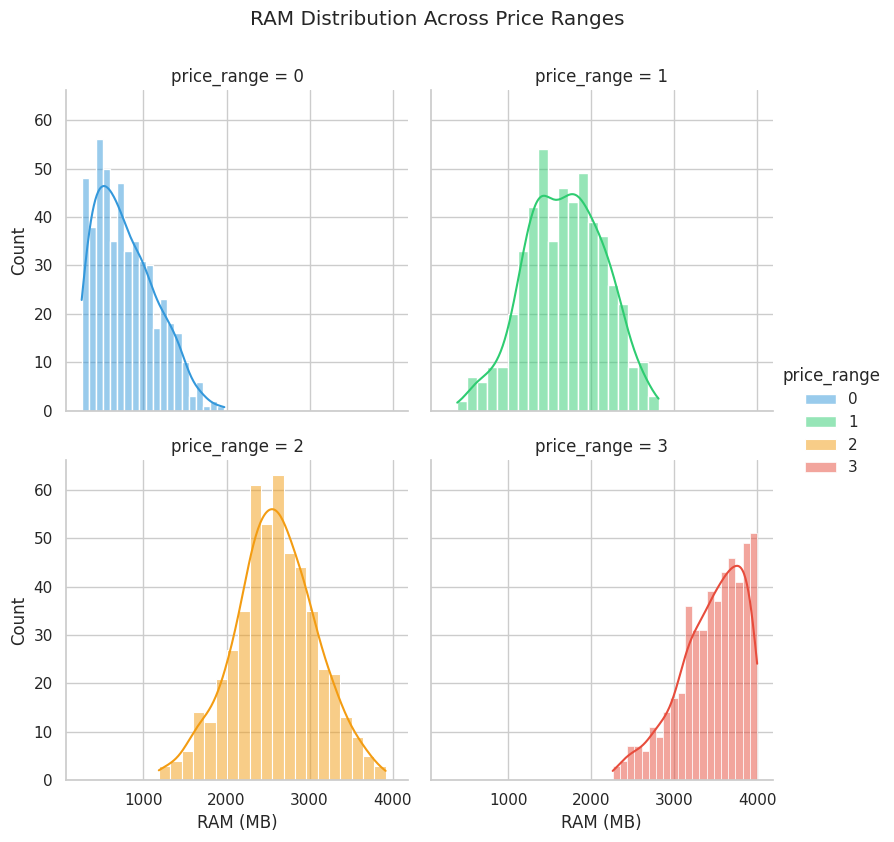

In [12]:
g = sns.FacetGrid(df, col='price_range', hue='price_range', 
                  col_wrap=2, height=4, palette=colors)
g.map(sns.histplot, 'ram', kde=True, bins=20)
g.fig.suptitle('RAM Distribution Across Price Ranges', y=1.05)
g.set_axis_labels('RAM (MB)', 'Count')
g.add_legend()
plt.show()

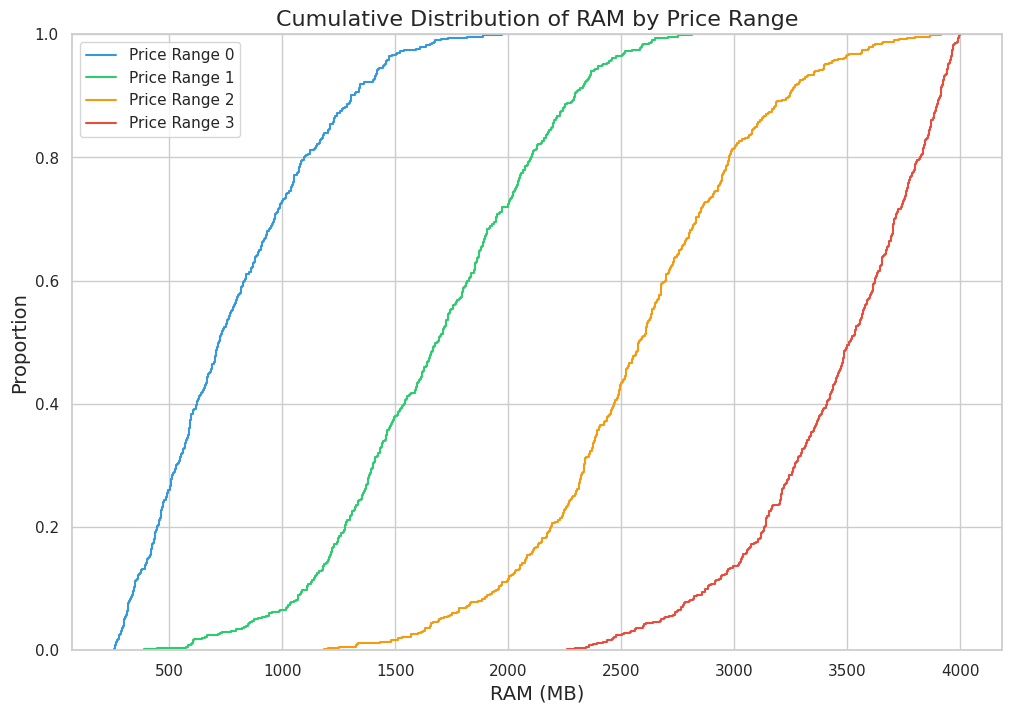

In [13]:
# not used
plt.figure(figsize=(12, 8))
for i in range(4):
    sns.ecdfplot(data=df[df['price_range'] == i], 
                 x='ram', 
                 label=f'Price Range {i}',
                 color=colors[i])
plt.title('Cumulative Distribution of RAM by Price Range', fontsize=16)
plt.xlabel('RAM (MB)', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.legend()
plt.show()


Custom Lagrangian OvR SVM Classification Report
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       100
           1       0.74      0.56      0.64       100
           2       0.71      0.61      0.66       100
           3       0.81      0.92      0.86       100

    accuracy                           0.77       400
   macro avg       0.76      0.77      0.76       400
weighted avg       0.76      0.77      0.76       400


Custom OvR SVM Confusion Matrix:


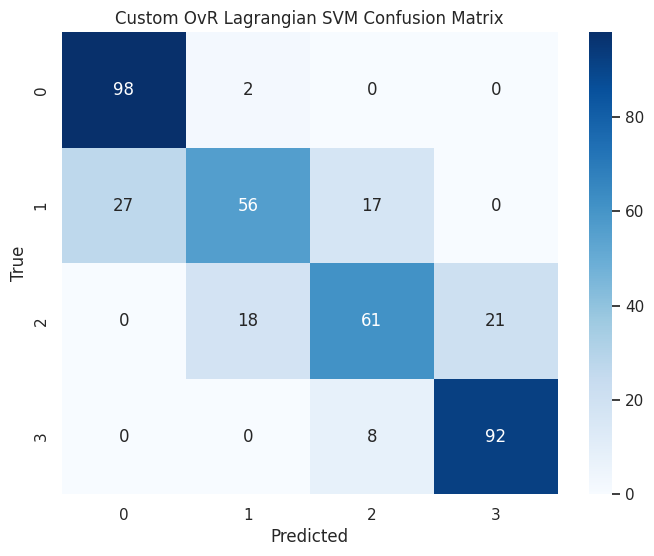

Custom OvR SVM Accuracy: 76.75%

Sklearn SVM Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.97      0.98      0.98       100
           2       0.97      0.94      0.95       100
           3       0.95      0.99      0.97       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


Sklearn SVM Confusion Matrix:


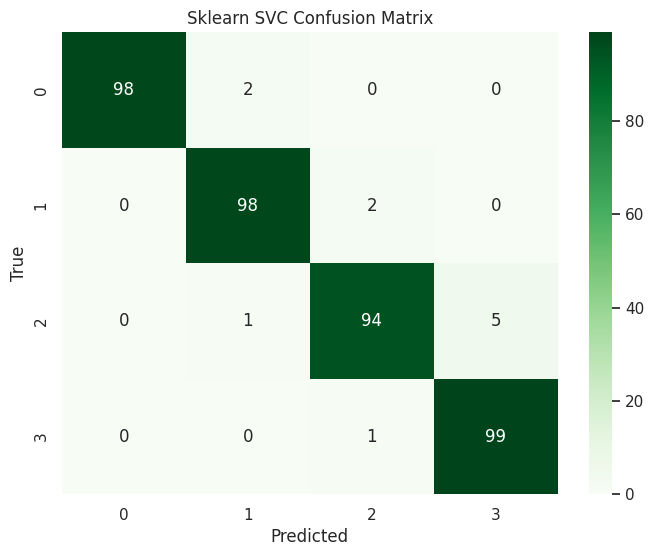

Sklearn SVC Accuracy: 97.25%

Summary:
Custom OvR SVM Accuracy: 76.75%
Sklearn SVC Accuracy   : 97.25%


In [15]:
df = pd.read_csv('../train_after_drop.csv')
X = df.drop('price_range', axis=1).values
y = df['price_range'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=19)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class LagrangianSVM:
    def __init__(self, C=0.1, tol=1e-3, max_iter=1500, kernel='linear'):
        self.C = C
        self.tol = tol
        self.max_iter = max_iter
        self.kernel = kernel
        
    def _kernel(self, X1, X2):
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'rbf':
            gamma = 1.0 / X1.shape[1]
            return np.exp(-gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2)**2)
        else:
            raise ValueError("Unknown kernel")
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.X = X
        self.y = y
        self.K = self._kernel(X, X)
        self.alpha = np.zeros(n_samples)
        self.b = 0
        self.sv_X = np.empty((0,))
        self.sv_y = np.empty((0,))
        self.sv_alpha = np.empty((0,))
        
        for _ in range(self.max_iter):
            alpha_prev = np.copy(self.alpha)
            for i in range(n_samples):
                Ei = self.decision_function(X[i].reshape(1, -1))[0] - y[i] if len(self.sv_X) else -y[i]
                if (y[i]*Ei < -self.tol and self.alpha[i] < self.C) or (y[i]*Ei > self.tol and self.alpha[i] > 0):
                    j = np.random.choice(range(n_samples))
                    Ej = self.decision_function(X[j].reshape(1, -1))[0] - y[j] if len(self.sv_X) else -y[j]
                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]
                    
                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])
                    if L == H:
                        continue
                    
                    eta = 2*self.K[i,j] - self.K[i,i] - self.K[j,j]
                    if eta >= 0:
                        continue
                    
                    self.alpha[j] -= y[j]*(Ei - Ej)/eta
                    self.alpha[j] = np.clip(self.alpha[j], L, H)
                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue
                    self.alpha[i] += y[i]*y[j]*(alpha_j_old - self.alpha[j])
                    
                    b1 = self.b - Ei - y[i]*(self.alpha[i]-alpha_i_old)*self.K[i,i] - y[j]*(self.alpha[j]-alpha_j_old)*self.K[i,j]
                    b2 = self.b - Ej - y[i]*(self.alpha[i]-alpha_i_old)*self.K[i,j] - y[j]*(self.alpha[j]-alpha_j_old)*self.K[j,j]
                    self.b = (b1 + b2) / 2
            if np.linalg.norm(self.alpha - alpha_prev) < self.tol:
                break
                
        sv_idx = self.alpha > 1e-5
        self.sv_X = X[sv_idx]
        self.sv_y = y[sv_idx]
        self.sv_alpha = self.alpha[sv_idx]
        
    def decision_function(self, X):
        if len(self.sv_X) == 0:
            return np.zeros(X.shape[0])
        K = self._kernel(X, self.sv_X)
        return np.dot(K, self.sv_alpha * self.sv_y) + self.b
    
    def predict(self, X):
        return np.sign(self.decision_function(X))

class OvRLagrangianSVM:
    def __init__(self, C=0.1, kernel='linear'):
        self.C = C
        self.kernel = kernel
        self.models = []
        self.classes = None
        
    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            binary_y = np.where(y == cls, 1, -1)
            model = LagrangianSVM(C=self.C, kernel=self.kernel)
            model.fit(X, binary_y)
            self.models.append(model)
    
    def predict(self, X):
        decisions = np.array([model.decision_function(X) for model in self.models])
        return self.classes[np.argmax(decisions, axis=0)]

# Train custom OvR Lagrangian SVM
ovr_svm = OvRLagrangianSVM(C=0.1, kernel='linear')
ovr_svm.fit(X_train, y_train)
y_pred_custom = ovr_svm.predict(X_test)

# -----------------------------------
# 4. Compare with Sklearn SVM
# -----------------------------------
svc = SVC(C=1.0, kernel='linear', random_state=42)
svc.fit(X_train, y_train)
y_pred_sklearn = svc.predict(X_test)

# -----------------------------------
# 5. Evaluation and Comparison
# -----------------------------------

print("\n" + "="*50)
print("Custom Lagrangian OvR SVM Classification Report")
print("="*50)
print(classification_report(y_test, y_pred_custom))

print("\nCustom OvR SVM Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_custom), annot=True, fmt="d", cmap="Blues")
plt.title("Custom OvR Lagrangian SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

custom_accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Custom OvR SVM Accuracy: {custom_accuracy*100:.2f}%")

print("\n" + "="*50)
print("Sklearn SVM Classification Report")
print("="*50)
print(classification_report(y_test, y_pred_sklearn))

print("\nSklearn SVM Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn), annot=True, fmt="d", cmap="Greens")
plt.title("Sklearn SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn SVC Accuracy: {sklearn_accuracy*100:.2f}%")

# -----------------------------------
# 6. Final Summary
# -----------------------------------
print("\n" + "="*50)
print("Summary:")
print("="*50)
print(f"Custom OvR SVM Accuracy: {custom_accuracy*100:.2f}%")
print(f"Sklearn SVC Accuracy   : {sklearn_accuracy*100:.2f}%")


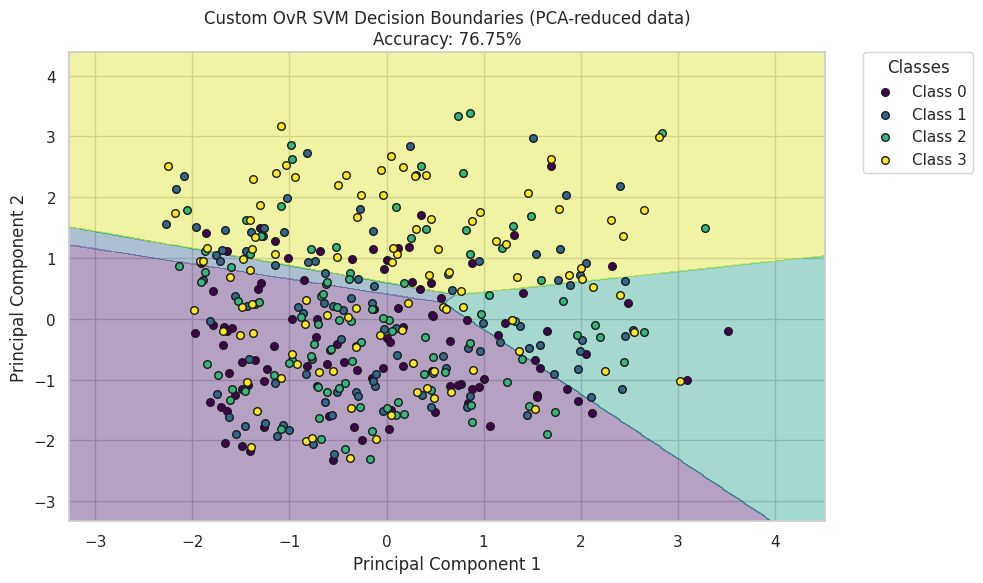

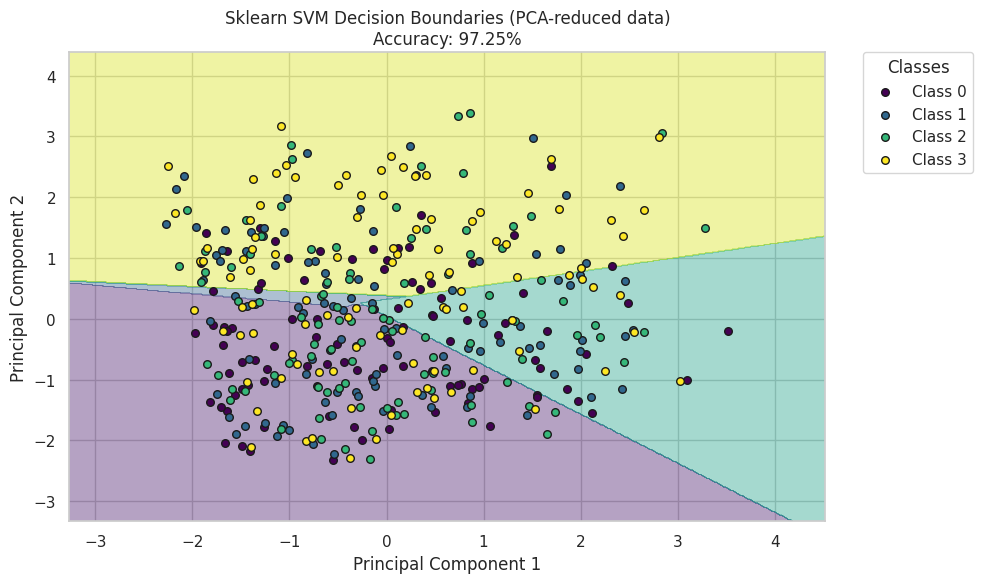

In [16]:

def plot_decision_boundary(model, X, y, title, is_custom_svm=False):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predict labels for mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

    # Unique classes and color map
    classes = np.unique(y)
    colors = plt.cm.viridis(np.linspace(0, 1, len(classes)))

    for idx, class_label in enumerate(classes):
        plt.scatter(X[y == class_label, 0], 
                    X[y == class_label, 1], 
                    color=colors[idx], 
                    label=f'Class {class_label}', 
                    edgecolor='k', 
                    s=30)

    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

# Apply PCA to the training and testing datasets
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train custom OvR SVM on PCA-reduced data
ovr_svm_pca = OvRLagrangianSVM(C=0.1, kernel='linear')
ovr_svm_pca.fit(X_train_pca, y_train)

svc_pca = SVC(C=1.0, kernel='linear', random_state=42)
svc_pca.fit(X_train_pca, y_train)
# Plot custom SVM decision boundaries
plot_decision_boundary(ovr_svm_pca, X_test_pca, y_test, 
                       "Custom OvR SVM Decision Boundaries (PCA-reduced data)\nAccuracy: {:.2f}%".format(custom_accuracy*100),
                       is_custom_svm=True)

# Plot sklearn SVM decision boundaries
plot_decision_boundary(svc_pca, X_test_pca, y_test,
                       "Sklearn SVM Decision Boundaries (PCA-reduced data)\nAccuracy: {:.2f}%".format(sklearn_accuracy*100))


In [17]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import precision_score, recall_score, f1_score

fig_acc = go.Figure(data=[
    go.Bar(name='Custom OvR SVM', x=['Custom OvR SVM'], y=[custom_accuracy*100], marker_color='dodgerblue',width=0.3),
    go.Bar(name='Sklearn SVC', x=['Sklearn SVC'], y=[sklearn_accuracy*100], marker_color='limegreen',width=0.3)
])
fig_acc.update_layout(
    title="Accuracy Comparison",
    yaxis_title="Accuracy (%)",
    xaxis_title="Model Name",
    barmode='group',
    template='plotly_white',
)

custom_precision = precision_score(y_test, y_pred_custom, average='macro')
custom_recall = recall_score(y_test, y_pred_custom, average='macro')
custom_f1 = f1_score(y_test, y_pred_custom, average='macro')

sklearn_precision = precision_score(y_test, y_pred_sklearn, average='macro')
sklearn_recall = recall_score(y_test, y_pred_sklearn, average='macro')
sklearn_f1 = f1_score(y_test, y_pred_sklearn, average='macro')

# Define categories
categories = ['Precision', 'Recall', 'F1-Score']

# Create Radar Chart
fig_radar = go.Figure()

fig_radar.add_trace(go.Scatterpolar(
      r=[custom_precision, custom_recall, custom_f1],
      theta=categories,
      fill='toself',
      name='Custom OvR SVM',
      line_color='dodgerblue'
))

fig_radar.add_trace(go.Scatterpolar(
      r=[sklearn_precision, sklearn_recall, sklearn_f1],
      theta=categories,
      fill='toself',
      name='Sklearn SVC',
      line_color='limegreen'
))

fig_radar.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]  # Metrics are between 0 and 1
    )),
  title="Custom OvR SVM vs Sklearn SVC (Precision, Recall, F1-Score)",
  template='plotly_white',
  showlegend=True
)
fig_acc.show()
fig_radar.show()


In [18]:
correct_custom = (y_pred_custom == y_test).sum()
incorrect_custom = (y_pred_custom != y_test).sum()

correct_sklearn = (y_pred_sklearn == y_test).sum()
incorrect_sklearn = (y_pred_sklearn != y_test).sum()

fig = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=(
        f"Custom OvR SVM<br><span style='font-size:12px'>Accuracy: {custom_accuracy*100:.2f}%</span>", 
        f"Sklearn SVC<br><span style='font-size:12px'>Accuracy: {sklearn_accuracy*100:.2f}%</span>"
    ),
    horizontal_spacing=0.15 
)

fig.add_trace(go.Pie(
    labels=['Correct', 'Incorrect'],
    values=[correct_custom, incorrect_custom],
    marker_colors=['#00C853', '#D50000'],
    hole=0.4,
    name="Custom SVM",
    textinfo='percent+value',
    textposition='inside',
    textfont_size=14,
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}",
    domain=dict(x=[0, 0.45])
), 1, 1)

fig.add_trace(go.Pie(
    labels=['Correct', 'Incorrect'],
    values=[correct_sklearn, incorrect_sklearn],
    marker_colors=['#00C853', '#D50000'],
    hole=0.4,
    name="Sklearn SVC",
    textinfo='percent+value',
    textposition='inside',
    textfont_size=14,
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}",
    domain=dict(x=[0.55, 1]) 
), 1, 2)

fig.update_layout(
    title_text="<b>Model Prediction Distribution Comparison</b>",
    title_x=0.5,
    title_y=0.97,
    title_font_size=20,
    showlegend=True,
    template='plotly_white',
    margin=dict(l=20, r=20, t=80, b=80),  
    height=500,
    width=950, 
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.15,  
        xanchor="center",
        x=0.5,
        font_size=12
    ),
   annotations=[
    dict(
        text="<b> SVM From Scratch </b>",
        x=0.22,
        y=-0.12, 
        showarrow=False,
        font_size=14,  
        font_color="purple",  
        xref="paper",
        yref="paper",
        bgcolor="white", 
        borderpad=4, 
        bordercolor="#D3D3D3", 
        borderwidth=1
    ),
    dict(
        text="<b> SVM By Sklearn</b>",
        x=0.78,
        y=-0.12, 
        showarrow=False,
        font_size=14,  
        font_color="purple",  
        xref="paper",
        yref="paper",
        bgcolor="white",  
        borderpad=4, 
        bordercolor="#D3D3D3", 
        borderwidth=1
    ) ]  )

fig.update_traces(
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    ),
    marker=dict(line=dict(color='#FFFFFF', width=2)),
    selector=dict(type='pie')
)

fig.update_annotations(
    yshift=10, 
    font_size=14
)

fig.show()

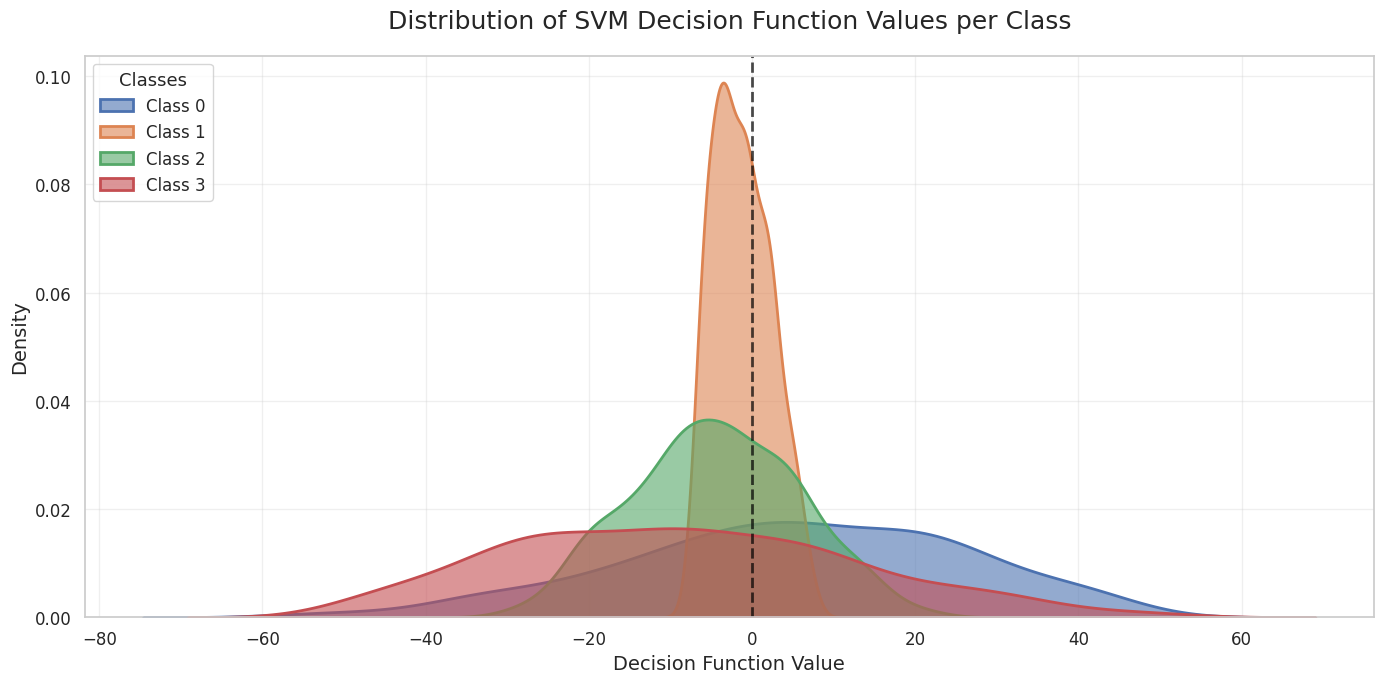

In [19]:
decision_values = [m.decision_function(X_test_pca) for m in ovr_svm_pca.models]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

for i, dv in enumerate(decision_values):
    sns.kdeplot(
        dv,
        fill=True,          
        linewidth=2,
        label=f'Class {i}',
        alpha=0.6            )

plt.axvline(0, color='black', linestyle='--', lw=2, alpha=0.7)

plt.title('Distribution of SVM Decision Function Values per Class', fontsize=18, pad=20)
plt.xlabel('Decision Function Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Classes', fontsize=12, title_fontsize=13, loc='upper left', frameon=True)

plt.tight_layout()

plt.grid(alpha=0.3)

plt.show()
